In [2]:
import flopy
import flopy.mf6 as mf6
import flopy.plot as fplt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm

In [3]:
# Load Simulation
sim = mf6.MFSimulation.load(sim_name='peterson', exe_name='../../mf6/mf6.exe', sim_ws='../input-files/')

loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package dis...
    loading package ic...
    loading package npf...
    loading package riv...
    loading package obs...
    loading package wel...
    loading package chd...
    loading package sto...
    loading package rch...
    loading package oc...
  loading solution package peterson_flow...


In [4]:
# Get flow model
gwf = sim.get_model('peterson_flow')

# Get PFOS model
gwt_pfos = sim.get_model('peterson_pfos')

In [6]:
conc = pd.read_csv('../output-files/pfos_obs.csv', index_col='time')

In [40]:
# Function to check convertibility
def is_convertible_to_float(val):
    try:
        float(val)
        return True
    except (ValueError, TypeError):
        return False

# Get row indexes
convertible_indexes = conc.index[conc['OBS_S4'].apply(is_convertible_to_float)].tolist()

In [ ]:
well = conc.loc[convertible_indexes, 'OBS_S4'].to_numpy('float64')

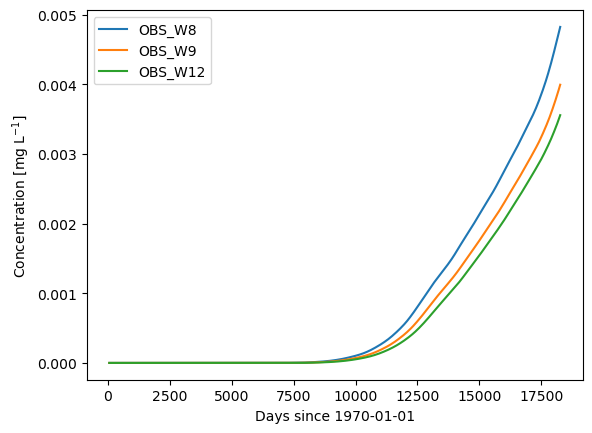

In [55]:
fig, ax = plt.subplots()

for column in conc.columns:
    convertible_indexes = conc.index[conc[column].apply(is_convertible_to_float)].to_numpy()
    well = conc.loc[convertible_indexes, column].to_numpy('float64')

    if well.max() > 0.002:
        ax.plot(convertible_indexes, well, label=column)
        ax.set_ylabel('Concentration [mg L$^{-1}$]')
        ax.set_xlabel('Days since 1970-01-01')

ax.legend()
    
plt.show()

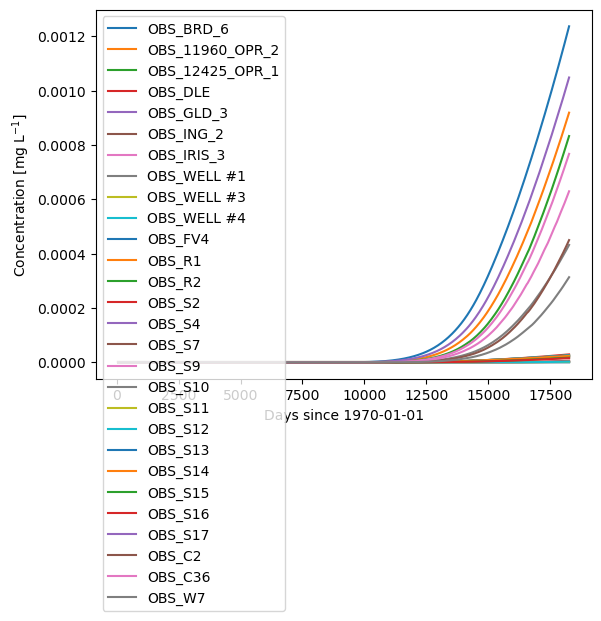

In [56]:
fig, ax = plt.subplots()

for column in conc.columns:
    convertible_indexes = conc.index[conc[column].apply(is_convertible_to_float)].to_numpy()
    well = conc.loc[convertible_indexes, column].to_numpy('float64')

    if well.max() < 0.002:
        ax.plot(convertible_indexes, well, label=column)
        ax.set_ylabel('Concentration [mg L$^{-1}$]')
        ax.set_xlabel('Days since 1970-01-01')

ax.legend()
    
plt.show()